In [23]:
autosave 30

Autosaving every 30 seconds


In [88]:
#Various imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt

# Descrizione del dataset
Available at: [*Weather in Szeged*](https://www.kaggle.com/budincsevity/szeged-weather/discussion)

In [20]:
#Define paths
dfPath = "./resources/weatherHistory.csv"
destinationPath = "./results/"

In [77]:
#Defining portion for train, validation and testing phase
portion = 0.4

In [21]:
#Load the dataset from memory 
df = pd.read_csv(dfPath)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [67]:
#Print dataset's head                     
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00


In [32]:
#Printing features' information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [68]:
#Preprocessing phase
df.loc[:,"Temperature (C)"] =  round(df.loc[:,"Temperature (C)"],2)
df.loc[:,"Apparent Temperature (C)"] = round(df.loc[:,"Apparent Temperature (C)"],2)
df.loc[:,"Wind Speed (km/h)"] = round(df.loc[:,"Wind Speed (km/h)"],2)


df["Date"] = df["Formatted Date"].apply(pd.to_datetime,utc=True)

In [71]:
#Printing some feature's information
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932698,10.855034,0.734899,10.810650,187.509232,10.347325,0.0,1003.235956
std,9.551532,10.696860,0.195473,6.913538,107.383428,4.192123,0.0,116.969906
min,-21.820000,-27.720000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.690000,2.310000,0.600000,5.830000,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.970000,180.000000,10.046400,0.0,1016.450000
75%,18.840000,18.840000,0.890000,14.140000,290.000000,14.812000,0.0,1021.090000
max,39.910000,39.340000,1.000000,63.850000,359.000000,16.100000,0.0,1046.380000


In [73]:
#Printing dataset's head at the end of preprocessing phase
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Date
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.47,7.39,0.89,14.12,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006-03-31 22:00:00+00:00
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.36,7.23,0.86,14.26,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006-03-31 23:00:00+00:00
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.38,9.38,0.89,3.93,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006-04-01 00:00:00+00:00
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.29,5.94,0.83,14.10,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006-04-01 01:00:00+00:00
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.76,6.98,0.83,11.04,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006-04-01 02:00:00+00:00


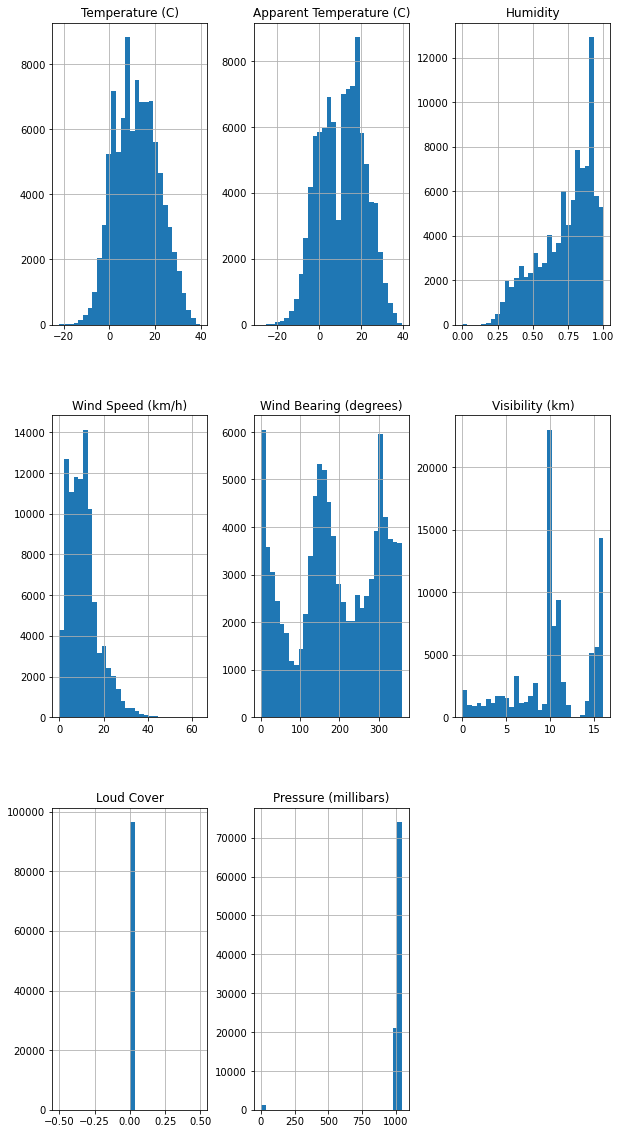

In [69]:
#Print data distribution
df.hist(bins = 30, figsize = (10,20))
plt.show()

In [115]:
[dfTrain,dfTest] = train_test_split(df,random_state=1,test_size=portion) 

# First regression: Correlation between Temperature And Humidity

In [124]:
x_train = dfTrain["Temperature (C)"].values
y_train = dfTrain["Humidity"].values

x_test = dfTest["Temperature (C)"].values
y_test = dfTest["Temperature (C)"].values

x_train = np.reshape(x_train,(-1,1))

In [125]:
reg = LinearRegression()

reg.fit(x_train,y_train)

print(f"Intercept: {reg.intercept_}")
print(f"Coefficient: {reg.coef_}")

Intercept: 0.8891175566087588
Coefficient: [-0.01290841]
